In [ ]:
import sys
import os
import re
import tweepy
from tweepy import OAuthHandler
from datetime import datetime, timedelta
from IPython.display import clear_output
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Login.csv to Login.csv


In [ ]:
log = pd.read_csv('Login.csv')
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accesToken = log['key'][2]
accesTokenSecret = log['key'][3]
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accesToken, accesTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
tweet_lst=[]
search_term = '#kiev -filter:retweets'

for tweet in tweepy.Cursor(api.search, q = search_term, lang = 'en', since = '2022-01-01', tweet_mode = 'extended').items(2000):
  tweetDate = tweet.created_at.date()
  tweet_lst.append([tweetDate, tweet.id, tweet.user.screen_name, tweet.user.name, tweet.full_text])

tweet_df = pd.DataFrame(tweet_lst, columns=['tweet_dt', 'id', 'username', 'name', 'tweet'])
tweet_df

,tweet_dt,id,username,name,tweet
0,2022-03-07,1500761584846753794,CryptoGeekNews,NewsGeek,🔴 Live Cam Ukraine - #Kiev - Multiple Views - ...
1,2022-03-07,1500761577129230338,Ukrbreakingnews,Ukraine Breaking News,#ukrainebreakingnews\nGas prices in #Europe ex...
2,2022-03-07,1500761214338666497,brucekenneway,)))ANOINTED BY MY SAVIOUR CHRIST JESUS(((,"#LIVE View Of #kiev Kyiv, #Odessa #Kharkiv an..."
3,2022-03-07,1500760820313169922,Ukrbreakingnews,Ukraine Breaking News,#ukrainebreakingnews\n#Ukrainian fighters thro...
4,2022-03-07,1500760749983023107,Mister_Ka,Mister Ka,Wondering why no one talks anymore about the '...
...,...,...,...,...,...
1995,2022-03-06,1500390918616403976,viralvdoz,ViralVdoz,Nomination of units of the Airborne Forces of ...
1996,2022-03-06,1500390268486524928,runwaymagazine,RUNWAY MAGAZINE ®,@ZelenskyyUa Dedication to Ukrainian History a...
1997,2022-03-06,1500390163716866051,NFTTrack,NFTTrack.eth 🚀🌕 Follow top NFT whale to earn!,The #Hearbroken Girls team has decided to dona...
1998,2022-03-06,1500389937480454146,vnykov,vnykov,#War #Ukraine #Putin #Biden #Russia #Ukraine #...


In [ ]:
def cleanTwt(twt):
  twt = re.sub(r'@[A-Za-z0-9]+', ' ', twt) #to remove @ mentions
  twt = re.sub(r'#', ' ', twt) #removes the # symbol
  twt = re.sub(r'RT[\s]+', ' ', twt) #removes retweet rt
  twt = re.sub(r'https?:\/\/\S+', ' ', twt) #removes hyperlinks

  return twt


tweet_df['cleaned_tweets'] = tweet_df['tweet'].apply(cleanTwt)

In [ ]:
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity


def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity


tweet_df['Subjectivity'] = tweet_df['tweet'].apply(getSubjectivity)
tweet_df['Polarity'] = tweet_df['tweet'].apply(getPolarity)
tweet_df

,tweet_dt,id,username,name,tweet,cleaned_tweets,Subjectivity,Polarity
0,2022-03-07,1500761584846753794,CryptoGeekNews,NewsGeek,🔴 Live Cam Ukraine - #Kiev - Multiple Views - ...,🔴 Live Cam Ukraine - Kiev - Multiple Views - ...,0.250000,0.068182
1,2022-03-07,1500761577129230338,Ukrbreakingnews,Ukraine Breaking News,#ukrainebreakingnews\nGas prices in #Europe ex...,ukrainebreakingnews\nGas prices in Europe ex...,0.000000,0.000000
2,2022-03-07,1500761214338666497,brucekenneway,)))ANOINTED BY MY SAVIOUR CHRIST JESUS(((,"#LIVE View Of #kiev Kyiv, #Odessa #Kharkiv an...","LIVE View Of kiev Kyiv, Odessa Kharkiv an...",0.450000,0.318182
3,2022-03-07,1500760820313169922,Ukrbreakingnews,Ukraine Breaking News,#ukrainebreakingnews\n#Ukrainian fighters thro...,ukrainebreakingnews\n Ukrainian fighters thro...,0.000000,0.000000
4,2022-03-07,1500760749983023107,Mister_Ka,Mister Ka,Wondering why no one talks anymore about the '...,Wondering why no one talks anymore about the '...,0.213333,0.036667
...,...,...,...,...,...,...,...,...
1995,2022-03-06,1500390918616403976,viralvdoz,ViralVdoz,Nomination of units of the Airborne Forces of ...,Nomination of units of the Airborne Forces of ...,0.000000,0.000000
1996,2022-03-06,1500390268486524928,runwaymagazine,RUNWAY MAGAZINE ®,@ZelenskyyUa Dedication to Ukrainian History a...,Dedication to Ukrainian History and Heritage...,0.750000,0.800000
1997,2022-03-06,1500390163716866051,NFTTrack,NFTTrack.eth 🚀🌕 Follow top NFT whale to earn!,The #Hearbroken Girls team has decided to dona...,The Hearbroken Girls team has decided to dona...,0.510417,-0.097917
1998,2022-03-06,1500389937480454146,vnykov,vnykov,#War #Ukraine #Putin #Biden #Russia #Ukraine #...,War Ukraine Putin Biden Russia Ukraine ...,0.150000,0.050000


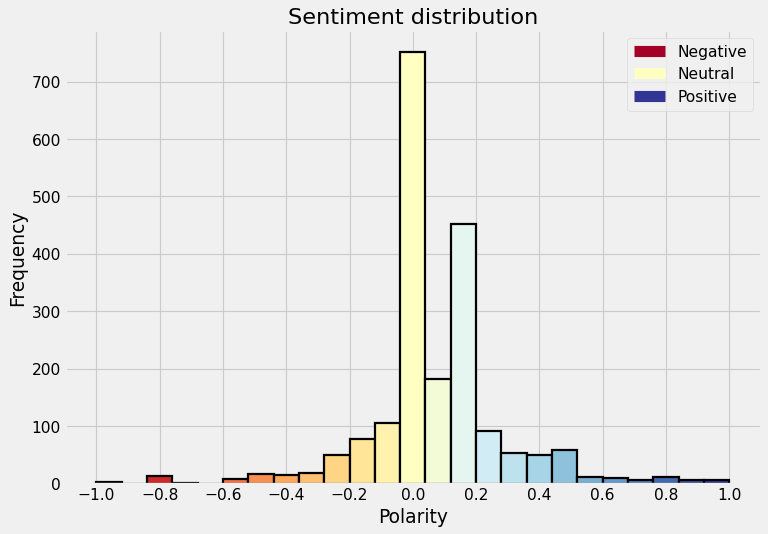

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 7), dpi= 80)
cm = plt.cm.get_cmap('RdYlBu')
n, bins, patches = plt.hist(tweet_df['Polarity'], 25, edgecolor='black', linewidth=2)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Sentiment distribution')
plt.xlabel('Polarity')
plt.xticks(np.arange(-1.0, 1.1, step=0.2))
plt.ylabel('Frequency')

custom_lines = [Line2D([0], [0], color=cm(0.), lw=10),
                Line2D([0], [0], color=cm(.5), lw=10),
                Line2D([0], [0], color=cm(1.), lw=10)]

plt.legend(custom_lines, ['Negative', 'Neutral', 'Positive'])

plt.show()

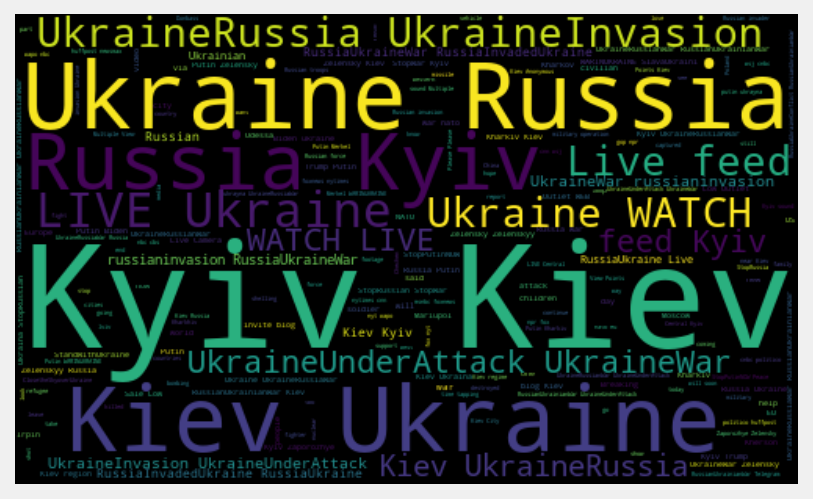

In [ ]:
allWords = ' '.join([twts for twts in tweet_df['cleaned_tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(allWords)
plt.rcParams["figure.dpi"] = (150)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()